In [1]:
import pennylane as qml 
import pennylane.numpy as pnp 
import numpy as np 
from qas import qml_gate_ops 
from qas import qml_models 
from qas import mcts
import os 
import json 
from pprint import pprint
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Setup methods loaded')
cwd = os.getcwd() 
print(cwd)

res_file = '20211009-231603.json'
with open(os.path.join(cwd, res_file)) as f:
    res_dict = json.load(f)

print(res_dict.keys())

props = global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 11)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Setup methods loaded
/home/peiyongw/Desktop/Research/QAS-Qiskit
dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


In [2]:
pool = {int(k):res_dict['pool'][k] for k in res_dict['pool'].keys()}
params = np.array(res_dict['params'])
#print(params.shape)
#print(res_dict['k'])
#print(pool)
model = qml_models.ToffoliQMLNoiseless(params.shape[0], params.shape[1], params.shape[2], res_dict['k'], pool)
#print(model.toList(params))
search_rewards = [s[2] for s in res_dict['search_reward_list']]
print(search_rewards)
fine_tune_loss_after_search = res_dict['fine_tune_loss']
print(fine_tune_loss_after_search)

[0.6353290709750954, 0.746336354246353, 0.5237699009662575, 0.7023524868712564, 0.7390591029784208, 0.7524781089701117, 0.9209153407786593]
[0.07908465922134067, 0.0745160370800797, 0.07128501737323245, 0.06863875497790806, 0.06633485674826745, 0.06425299680486696, 0.06232632412720285, 0.06051702142906501, 0.05880074581774419, 0.057159323870882295, 0.055578315643118104, 0.05404774116276989, 0.0525620689816676, 0.051118375909873226, 0.049714516186082025, 0.04834829114192485, 0.047017899753907244, 0.045722710257839916, 0.04446307675799077, 0.043239445733824544, 0.04205164435779596, 0.04089891471483331, 0.039780529883000626, 0.038696128114100725, 0.03764538360366432, 0.03662749511555863, 0.035641088836855794, 0.034684651194929916, 0.03375695897840958, 0.032857025469983814, 0.031983762258462445, 0.031135860515864144, 0.030312073410165397, 0.02951153405208551, 0.028733706076994103, 0.027978088891784214, 0.02724408801605216, 0.026531186636186144, 0.02583911318904608, 0.025167727093616032, 0.

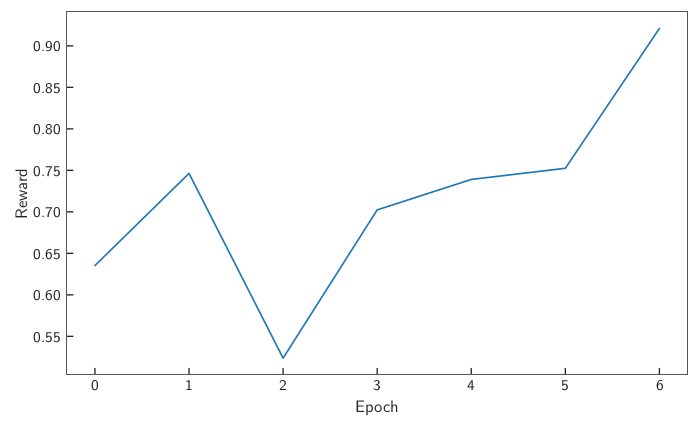

In [3]:
fig = plot_setup()
plt.plot(list(range(len(search_rewards))), search_rewards)
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.tight_layout()

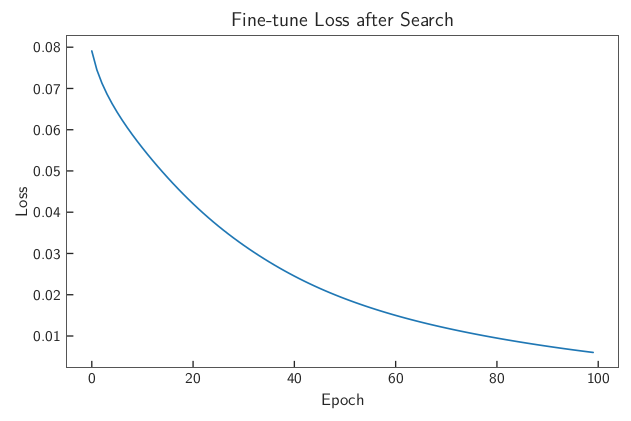

In [4]:
fig = plot_setup()
plt.plot(list(range(len(fine_tune_loss_after_search))), fine_tune_loss_after_search)
plt.title("Fine-tune Loss after Search")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [5]:
dev = qml.device('default.qubit', wires = 3)
@qml.qnode(dev)
def searched_circ(x):
    qml.QubitStateVector(x, wires=[0,1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(1.129680337296492, 1.5707922440908313, -0.0008633026512832973, wires=[1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(0.026147067452042146, -1.26553346484485, 0.8799594504776643, wires=[1,2])
    qml.Rot(-0.7463000265359258, 0.000728433748695468, 0.7427270846724496, wires = 1)
    qml.Rot(-0.7774424770311453, 0.0006764088145414327, -0.3979643430853004, wires = 0)
    qml.Rot(-0.942913291994291, -0.1571363759045717, 0.6860885220354251, wires = 2)
    return qml.state()

@qml.qnode(dev)
def target_circ(x):
    qml.QubitStateVector(x, wires=[0,1,2])
    qml.Toffoli(wires=[0,1,2])
    return qml.state()

computational_bases = {"0":np.array([1,0]), "1":np.array([0,1])}

In [6]:
print(qml.draw(searched_circ)(np.kron(computational_bases['1'], np.kron(computational_bases['1'], computational_bases['0']))))

 0: ──╭QubitStateVector(M0)──╭C───────────────────────────────╭C───Rot(-0.777, 0.000676, -0.398)────────────────────────────────╭┤ State 
 1: ──├QubitStateVector(M0)──│───╭C───────────────────────────│───╭C──────────────────────────────Rot(-0.746, 0.000728, 0.743)──├┤ State 
 2: ──╰QubitStateVector(M0)──╰X──╰Rot(1.13, 1.57, -0.000863)──╰X──╰Rot(0.0261, -1.27, 0.88)───────Rot(-0.943, -0.157, 0.686)────╰┤ State 
M0 =
[0 0 0 0 0 0 1 0]



In [7]:
for a in computational_bases.keys():
    for b in computational_bases.keys():
        for c in computational_bases.keys():
            state_name = a+b+c
            state = np.kron(np.kron(computational_bases[a], computational_bases[b]), computational_bases[c])
            print("State: ", state_name)
            print("State Vector: ")
            print(state)
            print("Searched Circ Output:")
            print(searched_circ(state))
            print("Target Circ Output:")
            print(target_circ(state))
            print()

State:  000
State Vector: 
[1 0 0 0 0 0 0 0]
Searched Circ Output:
[ 7.5086e-01+6.5578e-01j -1.3031e-02-7.7398e-02j  3.9920e-05+3.6089e-04j  1.5568e-05-2.3975e-05j  3.2005e-04+1.0604e-04j -1.4207e-05-2.2423e-05j  5.9748e-08+1.0728e-07j  1.7114e-09-9.5154e-09j]
Target Circ Output:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

State:  001
State Vector: 
[0 1 0 0 0 0 0 0]
Searched Circ Output:
[7.6509e-02-1.7512e-02j 8.9281e-01+4.4354e-01j 2.4840e-05+1.4147e-05j 1.3028e-04+3.3892e-04j 2.1558e-05-1.5488e-05j 3.3649e-04+2.1265e-05j 9.5988e-09+1.1550e-09j 8.5039e-08+8.8589e-08j]
Target Circ Output:
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

State:  010
State Vector: 
[0 0 1 0 0 0 0 0]
Searched Circ Output:
[-1.8545e-04+3.1229e-04j -2.5883e-05+8.1837e-06j  9.5495e-01-2.8724e-01j  6.7545e-02+3.1510e-02j -1.6888e-08+1.2167e-07j -6.9971e-09+5.9440e-09j  2.6008e-04-2.1472e-04j  2.5189e-05+9.7106e-07j]
Target Circ Output:
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0

In [8]:
final_params, loss_list = mcts.circuitModelTuning(
        initial_params=params,
        model=qml_models.ToffoliQMLNoiseless,
        num_epochs=400,
        k=res_dict['k'],
        op_pool=pool,
        opt_callable=qml.AdamOptimizer,
        lr=0.01,
        grad_noise_factor=0,
        verbose=1
    )

Training Circuit at Epoch 1/400; Loss: 0.005861596671831282
Training Circuit at Epoch 2/400; Loss: 0.005524210911090233
Training Circuit at Epoch 3/400; Loss: 0.00523311653075853
Training Circuit at Epoch 4/400; Loss: 0.0049940789727001
Training Circuit at Epoch 5/400; Loss: 0.004806161081915672
Training Circuit at Epoch 6/400; Loss: 0.004641285590759825
Training Circuit at Epoch 7/400; Loss: 0.004473184371652117
Training Circuit at Epoch 8/400; Loss: 0.004298579835388172
Training Circuit at Epoch 9/400; Loss: 0.004128832752743339
Training Circuit at Epoch 10/400; Loss: 0.003972081320468446
Training Circuit at Epoch 11/400; Loss: 0.0038277220028939407
Training Circuit at Epoch 12/400; Loss: 0.003689204113827227
Training Circuit at Epoch 13/400; Loss: 0.003551246209107184
Training Circuit at Epoch 14/400; Loss: 0.003414624114720377
Training Circuit at Epoch 15/400; Loss: 0.003283625620734143
Training Circuit at Epoch 16/400; Loss: 0.003161212888131093
Training Circuit at Epoch 17/400; L

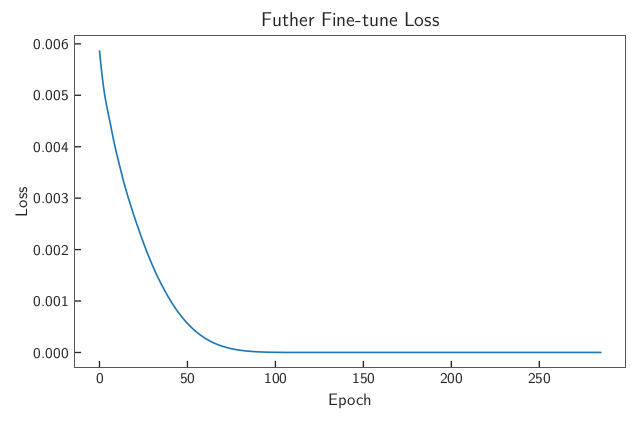

In [9]:
fig = plot_setup()
plt.plot(list(range(len(loss_list))), loss_list)
plt.title("Futher Fine-tune Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
model2 = qml_models.ToffoliQMLNoiseless(final_params.shape[0], final_params.shape[1], final_params.shape[2], res_dict['k'], pool)
print(model2.toList(final_params))

[('CNOT', [0, 2], None), ('CRot', [1, 2], [1.1296803375126658, 1.570796323089861, -4.693363476656587e-09]), ('CNOT', [0, 2], None), ('CRot', [1, 2], [-1.1930496390711057e-08, -1.5707963411733787, 0.9152925328473874]), ('Rot', [1], [-0.7463000261918807, 1.8594707168116864e-10, 0.7427270856294088]), ('PlaceHolder', [1], None), ('Rot', [0], [-0.777442478342968, -6.058753607240217e-10, -0.3979643442507351]), ('PlaceHolder', [0], None), ('Rot', [2], [-0.9075802096245629, 5.806605850872339e-09, 0.6860885219180933]), ('PlaceHolder', [2], None), ('PlaceHolder', [0], None), ('PlaceHolder', [1], None), ('PlaceHolder', [2], None), ('PlaceHolder', [2], None), ('PlaceHolder', [0], None)]


In [11]:
@qml.qnode(dev)
def searched_circ(x):
    qml.QubitStateVector(x, wires=[0,1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(1.1296803381386924, 1.5707963230898614, 0, wires=[1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(0, -1.5707963411733787, 0.9152925328474281, wires=[1,2])
    qml.Rot(-0.7463000267728153, 0, 0.7427270843683094, wires = 1)
    qml.Rot(-0.7774424773033537, 0, -0.3979643420400851, wires = 0)
    qml.Rot(-0.9075802096245182, 0, 0.6860885225524607, wires = 2)
    return qml.state()

print(qml.draw(searched_circ)(np.kron(computational_bases['1'], np.kron(computational_bases['1'], computational_bases['0']))))

 0: ──╭QubitStateVector(M0)──╭C───────────────────────╭C───Rot(-0.777, 0, -0.398)─────────────────────────╭┤ State 
 1: ──├QubitStateVector(M0)──│───╭C───────────────────│───╭C───────────────────────Rot(-0.746, 0, 0.743)──├┤ State 
 2: ──╰QubitStateVector(M0)──╰X──╰Rot(1.13, 1.57, 0)──╰X──╰Rot(0, -1.57, 0.915)────Rot(-0.908, 0, 0.686)──╰┤ State 
M0 =
[0 0 0 0 0 0 1 0]



In [12]:
for a in computational_bases.keys():
    for b in computational_bases.keys():
        for c in computational_bases.keys():
            state_name = a+b+c
            state = np.kron(np.kron(computational_bases[a], computational_bases[b]), computational_bases[c])
            print("State: ", state_name)
            print("State Vector: ")
            print(state)
            print("Searched Circ Output:")
            print(searched_circ(state))
            print("Target Circ Output:")
            print(target_circ(state))
            print()

State:  000
State Vector: 
[1 0 0 0 0 0 0 0]
Searched Circ Output:
[0.7647+0.6444j 0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
Target Circ Output:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

State:  001
State Vector: 
[0 1 0 0 0 0 0 0]
Searched Circ Output:
[0.    +0.j     0.8876+0.4607j 0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
Target Circ Output:
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

State:  010
State Vector: 
[0 0 1 0 0 0 0 0]
Searched Circ Output:
[ 0.0000e+00+0.0000e+00j  0.0000e+00+0.0000e+00j  9.4739e-01-3.2009e-01j -8.4365e-09-3.2526e-09j  0.0000e+00+0.0000e+00j  0.0000e+00+0.0000e+00j  0.0000e+00+0.0000e+00j  0.0000e+00+0.0000e+00j]
Target Circ Output:
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

State:  011
State Vector: 
[0 0 0 1 0 0 0 0]
Searched Circ Output:
[0.0000e+00+0.0000e+00j 0.0000e+00+0.0000e+00j 6.2744e-09

In [13]:
@qml.qnode(dev)
def searched_circ_stem(x):
    qml.QubitStateVector(x, wires=[0,1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(1.1296803381386924, 1.5707963230898614, 0, wires=[1,2])
    qml.CNOT(wires =[0,2])
    qml.CRot(0, -1.5707963411733787, 0.9152925328474281, wires=[1,2])
    qml.Rot(-0.7463000267728153, 0, 0.7427270843683094, wires = 1)
    qml.Rot(-0.7774424773033537, 0, -0.3979643420400851, wires = 0)
    qml.Rot(-0.9075802096245182, 0, 0.6860885225524607, wires = 2)
    return qml.state()

compiled_qfunc = qml.compile(
    pipeline=[
        qml.transforms.commute_controlled(direction="left"),
        qml.transforms.merge_rotations(atol=1e-6),
        qml.transforms.cancel_inverses
    ],
    basis_set=["CNOT", "RX", "RY", "RZ"],
    num_passes=200
)(searched_circ_stem)

print(qml.draw(searched_circ_stem)(np.kron(computational_bases['0'], np.kron(computational_bases['1'], computational_bases['0']))))
compiled_qnode = qml.QNode(compiled_qfunc, dev)
print(qml.draw(compiled_qnode)(np.kron(computational_bases['0'], np.kron(computational_bases['1'], computational_bases['0']))))


 0: ──╭QubitStateVector(M0)──╭C───────────────────────╭C───Rot(-0.777, 0, -0.398)─────────────────────────╭┤ State 
 1: ──├QubitStateVector(M0)──│───╭C───────────────────│───╭C───────────────────────Rot(-0.746, 0, 0.743)──├┤ State 
 2: ──╰QubitStateVector(M0)──╰X──╰Rot(1.13, 1.57, 0)──╰X──╰Rot(0, -1.57, 0.915)────Rot(-0.908, 0, 0.686)──╰┤ State 
M0 =
[0 0 1 0 0 0 0 0]

 0: ──RZ(-1.18)──╭C────────────╭C────────────────────╭C────────────────────────────────────────────────────────────╭C────────────────────────────────────────────────────────────────────╭┤ State 
 1: ──RY(1.57)───╰X──RY(1.57)──╰X──RZ(-0.00357)──╭C──│───╭C─────────────╭C──────────────────────────╭C─────────────│───────────────╭C─────────────────────────╭C─────────────────────────├┤ State 
 2: ─────────────────────────────────────────────╰X──╰X──╰X──RZ(0.565)──╰X──RZ(-0.565)──RY(-0.785)──╰X──RY(0.785)──╰X──RZ(-0.458)──╰X──RZ(-0.458)──RY(0.785)──╰X──RY(-0.785)──RZ(0.694)──╰┤ State 

